<a href="https://colab.research.google.com/github/GitShamil/ML_homeworks/blob/main/IAD_4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

Проверка на пропущенные значения

In [4]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Проверка на категориальные признаки

In [5]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.7,random_state=228)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [9]:
scaler = StandardScaler()
X_train_two_features = scaler.fit_transform(X_train[['alcohol', 'magnesium']])
X_test_two_features = scaler.transform(X_test[['alcohol', 'magnesium']])

In [10]:
info = pd.DataFrame(columns=['NN', 'Train', 'Test'])

In [11]:
k_neighbors = [1, 3, 5, 10, 15, 25]
for k in k_neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train_two_features,y_train)
  y_pred_train = classifier.predict(X_train_two_features)
  train_score = accuracy_score(y_train, y_pred_train)
  y_pred_test = classifier.predict(X_test_two_features)
  test_score = accuracy_score(y_test, y_pred_test)
  info_k = pd.DataFrame({'NN':[k],'Train':[train_score],'Test':[test_score]})
  info = pd.concat([info,info_k], ignore_index = True )

In [12]:
info

,NN,Train,Test
0,1,1.000000,0.656
1,3,0.867925,0.640
2,5,0.886792,0.632
3,10,0.735849,0.608
4,15,0.716981,0.592
5,25,0.679245,0.616


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [13]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

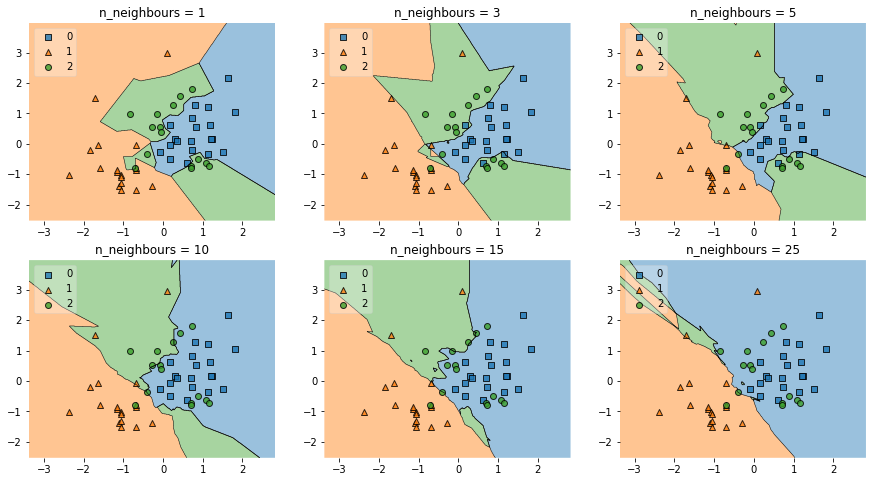

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for k, grd in zip([1, 3, 5, 10, 15, 25], itertools.product([0, 1, 2], repeat=2)):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train_two_features,y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_two_features, y=y_train, clf=classifier, legend=2)
    plt.title(f"n_neighbours = {k}")

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Оптимальное число соседей - 1. При таком числе соседей получается наулиучшая метрика на тесте. 
На графике также можно это пронаблюдать. Видно, что при числе соседей 1 нет никаких непонятный выбросов и резких искажений, в отличии от других графиков.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

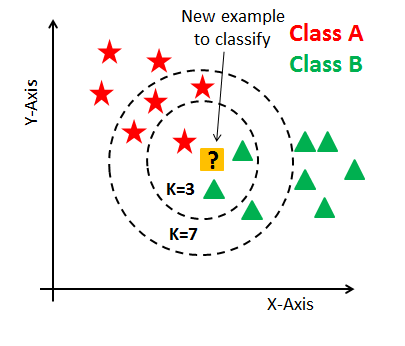

In [16]:
import numpy as np
from collections import Counter 
from collections import defaultdict 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      if (type(X) is not np.array):
        X = np.array(X)
      if (type(y) is not np.array):
        X = np.array(X)
      self.X_train = X
      self.y_train = y

    def knn(self, X):
      X_tr = self.X_train
      y_tr = self.y_train
      X_tr = X_tr - X.reshape(1,-1)
      X_tr = X_tr * X_tr
      X_tr = np.sum(X_tr,axis= 1)
      data_train = sorted(np.concatenate([X_tr.reshape(-1,1), y_tr.reshape(-1,1)], axis = 1).tolist(), key = lambda x: x[0])
      dif_types = defaultdict(int)
      for i in range(self.k):
        dif_types[data_train[i][1]] += 1

      most_popular_value = 0
      number_of_met = 0
      for x in dif_types:
        if dif_types[x] > number_of_met:
          most_popular_value = x
          number_of_met = dif_types[x]
      return most_popular_value
    
    def predict(self, X):
      if (type(X) is not np.array):
        X = np.array(X)
      return np.apply_along_axis(self.knn, axis=1, arr=X)

In [17]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [18]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [66]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [67]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [68]:
data = data.drop('Unnamed: 0', axis = 1)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [69]:
y_data = data['price']
data = data.drop('price', axis = 1)
numeric_features = data.select_dtypes([np.number]).columns.to_list()
categorical_features = data.select_dtypes(['object']).columns.to_list()

In [70]:
data[numeric_features].corrwith(y_data)

carat    0.921591
depth   -0.010647
table    0.127134
x        0.884435
y        0.865421
z        0.861249
dtype: float64

С целевой переменной коррелируют больше всего: carat и размеры(x,y,z).


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [71]:
categorical_features

['cut', 'color', 'clarity']

In [72]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')
one_hot_features = pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray())
data_oneHot = pd.concat([data.drop(categorical_features, axis = 1), one_hot_features],axis= 1)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [73]:
data_oneHot.columns = data_oneHot.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(data_oneHot, y_data, test_size = 0.3, random_state=228)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train[numeric_features])
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
model = LinearRegression().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f"mse train: {mse(y_pred_train, y_train)} \n mse test: {mse(y_pred_test, y_test)}")

mse train: 1277369.7145397074 
 mse test: 1276274.6159733103


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [76]:
coefs_linear = model.coef_
coefs_linear_with_name = list(zip(X_train.columns, coefs_linear))
coefs_linear_with_huge_weight = list(filter(lambda x: x[1] > coefs_linear.mean() + coefs_linear.std(), coefs_linear_with_name))
list(map(lambda x: x[0], coefs_linear_with_huge_weight))

['carat', '10', '13', '14', '15', '16']

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [77]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
model_ridge = Ridge(alpha = 10).fit(X_train, y_train)
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(X_test)
print(f"Ridge : mse train: {mse(y_pred_train, y_train)} \n mse test: {mse(y_pred_test, y_test)}")
model_lasso = Lasso(alpha = 10).fit(X_train, y_train)
y_pred_train = model_lasso .predict(X_train)
y_pred_test = model_lasso .predict(X_test)
print(f"Lasso : mse train: {mse(y_pred_train, y_train)} \n mse test: {mse(y_pred_test, y_test)}")

Ridge : mse train: 1281324.9692750783 
 mse test: 1280911.1249638277
Lasso : mse train: 1512212.8915489444 
 mse test: 1502123.528503551


In [78]:
coefs_ridge = model_ridge.coef_
coefs_lasso = model_lasso.coef_
print(f"ridge mean weight: {coefs_ridge.mean()} \n"
      f"lasso mean weight: {coefs_lasso.mean()} \n"
      f"linear mean weight: {coefs_linear.mean()} \n"
      )

ridge mean weight: 1220.1909595820152 
lasso mean weight: 214.19062357237976 
linear mean weight: 1377.3728058870538 



**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [79]:
from sklearn.model_selection import GridSearchCV

alphas = [0.1, 1, 10, 100, 200]

norm_lasso = []
norm_ridge = []

for  alpha in alphas:
  model_ridge = Ridge(alpha = alpha).fit(X_train, y_train)
  model_lasso = Lasso(alpha = alpha).fit(X_train, y_train) 
  norm_lasso.append(np.linalg.norm(model_lasso.coef_))
  norm_ridge.append(np.linalg.norm(model_ridge.coef_))

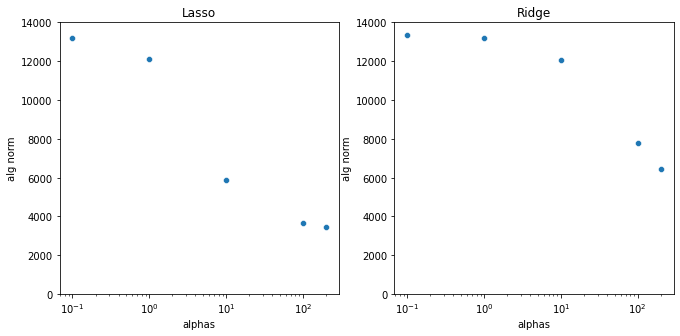

In [80]:
import seaborn as sns
fig, (a,b) = plt.subplots(1,2, figsize=(11, 5))
a.set_title("Lasso")
b.set_title("Ridge")
for ax in (a,b):
  ax.set_xscale('log')
  ax.set_xlabel('alphas')
  ax.set_ylabel('alg norm')
  ax.set_ylim(0,14000)
sns.scatterplot(x=alphas, y=norm_lasso, ax=a)
sns.scatterplot(x=alphas, y=norm_ridge, ax=b)
fig.show()

Видно, что Lasso сильнее уменьшает веса.
Lasso чаще именно зануляет веса, поэтому его использует для обнаружение более важных признаков. То есть там где не занулил => признак важен. Где не занулил => не важен

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [81]:
from sklearn.linear_model import LassoCV
alphas = [0.1, 1, 10, 100, 200]
model = LassoCV(cv = 5, alphas = alphas)
model.fit(X_train, y_train)
loss = list(zip(model.alphas_, model.mse_path_.mean(axis = 1)))
best_alpha = min(loss, key = lambda x: x[1])[0]

In [82]:
print(f"best alpha is {best_alpha}")

best alpha is 0.1


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [83]:
model_lasso = Lasso(alpha = best_alpha).fit(X_train, y_train) 
coefs_lasso = model.coef_
coefs_lasso_with_name = list(zip(X_train.columns, coefs_lasso))
coefs_lasso_with_name

[('carat', 5329.456252894726),
 ('depth', -80.85247372716859),
 ('table', -47.19113354811621),
 ('x', -1054.677446346283),
 ('y', 0.16961274518670058),
 ('z', -101.1856212331266),
 ('0', 609.2382913477722),
 ('1', 872.2931077642263),
 ('2', 770.5431211368832),
 ('3', 743.8653250380887),
 ('4', -197.667163044553),
 ('5', -258.2287797583599),
 ('6', -479.2856335235438),
 ('7', -959.7949645408743),
 ('8', -1469.3603135426806),
 ('9', -2362.152115367957),
 ('10', 5279.479618017523),
 ('11', 3579.979719890176),
 ('12', 2627.8684298528087),
 ('13', 4510.54923270941),
 ('14', 4193.7382636483235),
 ('15', 4925.884346830061),
 ('16', 4881.475869521145)]

Как видно carat важный признак. Также важны признаки с 10 по 16, это столбцы от clarity. 

Получается carat и clarity самые важные. Из смысла это тоже понятно - это основные характеристики драгоценных камней.

Интересный факт с признаками x,y,z. Они очевидно очень ЛЗ между собой. И модель поэтому забила на y и z, вместо них обучилась только на x. Это очень логично, потому что x описывает все три признака и нет смысла от y,z.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [61]:
y_pred_test = model_lasso .predict(X_test)
print(f"Lasso : mse test: {mse(y_pred_test, y_test)}")

Lasso : mse test: 1276317.4273680835


Не знаю что сказать. MSE на тесте получились статистически одинаковые. Лучше использовать модель lasso, потому что в ней можно выкинуть некоторое неважные веса и облегчить модель. Почему модели оказались почти равными? Почему нет переобучения?

На мой взгляд на это указывает то, что модель очень слабая (всего лишь линейная, не какая-то сильная нейронка)
Признаков очень мало по сравнению с колличеством обьектов на обучении. 
Поэтому она никак и не могла переобучиться и смысла от регуляризации нет в этом случае, кроме как нахождение бессмысленных признаков.